# Simulating a real-world phenomenon
***

### Table of contents

#### 1. Introduction

#### 2. Variables

#### 3. Building the Data Set

#### 3. Analysis

#### 4. Conclusion

#### 5. References

<br>

### 1. Introduction
***
Synthetic data is information that is artificially manufactured rather than generated by real-world events. This data is created algorithmically, and is used as a stand-in for test data sets of production or operational data, to validate models and, increasingly, to train machine learning models. It can be numerical, binary or categorical, and should preferably be random.<SUP>1</SUP>

The data set will be created using the ```numpy.random``` package, which is used to generate random numbers and random sampling. As I am personally interested in health and fitness, the chosen real-world phenomenon to simulate is the tracking of weight loss progress of a client over the course of a calendar year. The variables included in the data set are those that would typically be used measure a person's health and/or measured when on a personal training programme. As everyone has different goals, this example specifically simulates the weight loss progress of an overweight 35 year old male. 

The code below imports all the required libraries, applies a preferred plot style and sets a seed to allow for reproducible outputs.

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Apply a plot style
plt.style.use("ggplot")

# Set the seed for reproducible outputs
np.random.seed(100)

The first step is to define the height and starting weight of the client, as these will be used in the calculations.

In [3]:
# Define the weight and height
weight_kg = 90
height_m = 180

### 2. Variables
***
The data set will comprise the following variables:

- Date
- Day
- Weight (kg)
- Resting Heart Rate (bpm)
- Fasting Blood Glucose (mmol/L)
- Workout
- Calorie Intake
- Calorie Output
- Calorie Difference
- Total Daily Energy Expenditure
- Weight
- Body Mass Index

### 3. Building the Data Set
***

#### 3.1 Date/Day

The ```pandas.date_range()``` function is a general function in Pandas used to return a fixed frequency DateTimeIndex.<SUP>2</SUP> As the client's stats will be recorded every day for the entire year of 2020, the *freq* parameter is set to *D*. To create a column with the corresponding day, the ```pandas.Series.dt.day_name()``` function returns the day names of the DateTimeIndex.<SUP>3</SUP> This column is then converted to a categorical data type from an object data type as it only consists of 7 repeating values.<SUP>4</SUP> <SUP>5</SUP> The ```DataFrame.head()``` function is then used to return the first 10 rows of the DataFrame.<SUP>6</SUP>

In [4]:
# Define the start and end date
date = pd.date_range("2020-01-01", "2020-12-31", freq="D")
# Create the Date column
df = pd.DataFrame({"Date": date})
# Create the Day column
df["Day"] = df["Date"].dt.day_name()
# Change the data type from object to categorical
df["Day"] = df["Day"].astype("category")

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day
0,2020-01-01,Wednesday
1,2020-01-02,Thursday
2,2020-01-03,Friday
3,2020-01-04,Saturday
4,2020-01-05,Sunday
5,2020-01-06,Monday
6,2020-01-07,Tuesday
7,2020-01-08,Wednesday
8,2020-01-09,Thursday
9,2020-01-10,Friday


Although there are slightly more Wednesdays and Thursdays in 2020, the plot below illustrates a discrete uniform distribution.

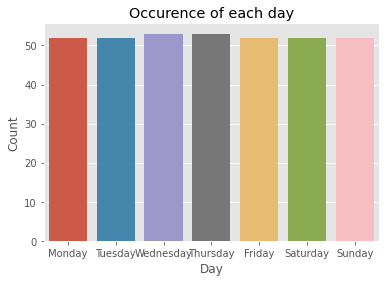

In [5]:
# Plot the occurence of each day
sns.countplot(df.Day, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
# Add plot title and axes labels
plt.xlabel("Day"), plt.ylabel("Count"), plt.title("Occurence of each day"), 
plt.show()

#### 3.2 Activity

The next step is to define the list of workouts based on the workout programme provided to this particular client. The programme requires four days of strength training, 1-2 days of cardio and one rest day. While there is flexibility in terms of what day each workout occurs on, this particular client prefers to undertake strength training from Monday to Thursday and cardio/rest from Friday to Sunday. The client always takes Sunday as a rest day, but may do some cardio on Fridays and Saturdays.

A list of the workout categories is first created. Individual variables are then created to separate the days of the week. The ```numpy.random.choice()``` function is applied to extract a random sample from the ```workouts``` list for each day of the week. The probability parameter ```p``` is set to 50% for legs and resistance from Monday to Thursday. The client is more likely to rest on Fridays, so the probability is set to 75% for that day.

In [11]:
# Define list of workouts
workouts = ["Rest", "Cardio", "Legs", "Resistance"]

# Separate the days of the week
mon = df["Day"] == "Monday"
tue = df["Day"] == "Tuesday"
wed = df["Day"] == "Wednesday"
thu = df["Day"] == "Thursday"
fri = df["Day"] == "Friday"
sat = df["Day"] == "Saturday"
sun = df["Day"] == "Sunday"

# Define probabilities for each day
prob_mon = np.random.choice(workouts, p=[0, 0, 0.5, 0.5])
prob_tue = np.random.choice(workouts, p=[0, 0, 0.5, 0.5])
prob_wed = np.random.choice(workouts, p=[0, 0, 0.5, 0.5])
prob_thu = np.random.choice(workouts, p=[0, 0, 0.5, 0.5])
prob_fri = np.random.choice(workouts, p=[0.75, 0.25, 0, 0])
prob_sat = np.random.choice(workouts, p=[0.25, 0.75, 0, 0])
prob_sun = np.random.choice(workouts, p=[1, 0, 0, 0])

# Create the Workout column
df["Workout"] = np.select([mon, tue, wed, thu, fri, sat, sun], [prob_mon, prob_tue, prob_wed, prob_thu, prob_fri, prob_sat, prob_sun], default=np.nan)
df["Workout"] = df["Workout"].astype("category")

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout
0,2020-01-01,Wednesday,Resistance
1,2020-01-02,Thursday,Legs
2,2020-01-03,Friday,Cardio
3,2020-01-04,Saturday,Cardio
4,2020-01-05,Sunday,Rest
5,2020-01-06,Monday,Legs
6,2020-01-07,Tuesday,Resistance
7,2020-01-08,Wednesday,Resistance
8,2020-01-09,Thursday,Legs
9,2020-01-10,Friday,Cardio


The plot below illustrates how many days of each workout was done throughout the year.

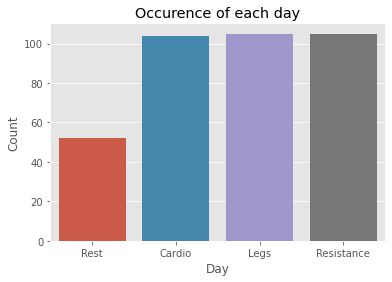

In [12]:
# Plot the occurence of each day
sns.countplot(df.Workout, order=["Rest", "Cardio", "Legs", "Resistance"])
# Add plot title and axes labels
plt.xlabel("Day"), plt.ylabel("Count"), plt.title("Occurence of each day"), 
plt.show()

#### 3.3 Calories Burned

To simulate calorie burn by each workout, the client's weight is multiplied by the Metabolic Equivalent (MET), which returns an approximation of the number of calories burned during one hour of that particular activity.<SUP>7</SUP> METs are frequently used as a guide categorise cardiorespiratory fitness (CRF). However, Franklin et al., (2017) states that this is often overestimated.<SUP>8</SUP>

![MET](met.png)

According to this method, the MET for each activity is listed below:

- Cardio (jogging, general) = 7.0 
- Legs (resistance (weight) training, squats, slow or explosive effort) = 5.0
- Chest/Delts/Arms (resistance (weight) training, multiple exercises, 8-15 repetitions at varied resistance) = 3.5

The code below calculates the calories burned by multiplying these values by the client's weight.

In [15]:
# Calculate the calories burned by multiplying the start weight by the MET value
cal_rest = weight_kg
cal_cardio = weight_kg * 7.0
cal_legs = weight_kg * 5.0
cal_resistance = weight_kg * 3.5

A function is then defined to extract a random value from a uniform distribution using the ```numpy.random.uniform()``` function depending on each workout. A *lambda* function is used to assign the generated values to their appropriate row in the data set.<SUP>9</SUP>

In [19]:
# Define function to estimate the calories burned by each workout
def cals_burned(row):
    if row["Workout"] == "Rest": return 0
    if row["Workout"] == "Cardio": return int(np.random.uniform(cal_cardio/2, cal_cardio))
    if row["Workout"] == "Legs": return int(np.random.uniform(cal_legs/2, cal_legs))
    if row["Workout"] == "Resistance": return int(np.random.uniform(cal_resistance/2, cal_resistance))

# Create the Burned column
df["Burned"] = df.apply(lambda row: cals_burned(row), axis= 1)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned
0,2020-01-01,Wednesday,Resistance,225
1,2020-01-02,Thursday,Legs,398
2,2020-01-03,Friday,Cardio,583
3,2020-01-04,Saturday,Cardio,510
4,2020-01-05,Sunday,Rest,0
5,2020-01-06,Monday,Legs,310
6,2020-01-07,Tuesday,Resistance,264
7,2020-01-08,Wednesday,Resistance,206
8,2020-01-09,Thursday,Legs,388
9,2020-01-10,Friday,Cardio,603


To illustrate the uniform distribution, the plots below shows the burned calories distribution returned for each workout.

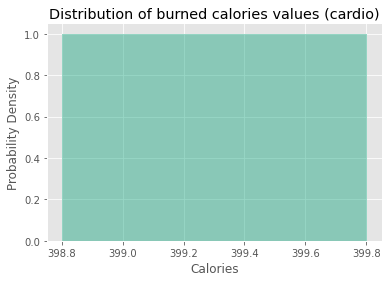

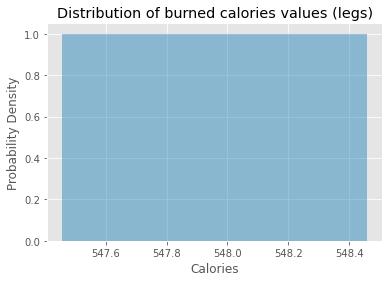

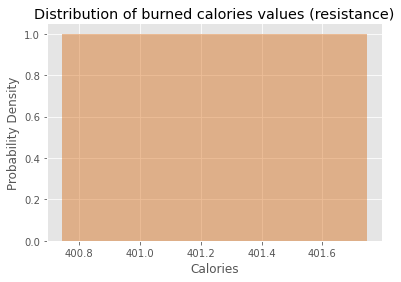

In [29]:
# Plot the distribution of burned calories during the cardio workout
sns.distplot(np.random.uniform(cal_cardio/2, cal_cardio), kde=False, color="#009E73")
# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of burned calories values (cardio)"), 
plt.show()

# Plot the distribution of burned calories during the legs workout
sns.distplot(np.random.uniform(cal_cardio/2, cal_cardio), kde=False, color="#0072B2")
# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of burned calories values (legs)"), 
plt.show()

# Plot the distribution of burned calories during the resistance workout
sns.distplot(np.random.uniform(cal_cardio/2, cal_cardio), kde=False, color="#D55E00")
# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of burned calories values (resistance)"), 
plt.show()

#### 3.4 Body Mass Index (BMI)

Body Mass Index (BMI) serves as a guidline to determine if a person is underweight, an optimal weight, overweight or obese based on their height and weight. The formula to determine BMI is kg/m<SUP>2</SUP> and the result categorises a person as per the diagram below.<SUP>10</SUP> The subsequent code calculates this client's BMI, which in this case is 27.78 using their weight and height as parameters. This places the client in the "Overweight" category.

![BMI](bmi.png)

In [37]:
# Define function to calculate BMI
def bmi(weight, height):
    bmi = weight/(height/100)**2
    return bmi

# Calculate the client's BMI using their height and weight
starting_bmi = bmi(weight_kg, height_m)

# Print the BMI
print("BMI: ", round(starting_bmi, 2))

BMI:  27.78


#### 3.5 Total Daily Energy Expenditure (TDEE)

Total Daily Energy Expenditure (TDEE) is a person's estimated energy expenditure when daily activity is taken into account, and is a combination of resting metabolic rate (RMR), thermic effect of food and physical activity.<SUP>11</SUP> It represents the amount of calories a person should consume to maintain their current weight. Therefore, the client should consume less than this to lose weight.

![TDEE](tdee.png)

The Basal Metabolic Rate (BMR) is a person's estimated energy expenditure over the course of a day when they are at rest. It is determined by the person's weight, height, age, and sex. The code below calculates this client's BMR using the Harris-Benedict equation, which is needed to determine the TDEE.<SUP>12</SUP>

In [31]:
# Define variables to determined BMR
age, male, female = 35, 5, -161

# Define a function to calculate BMR
def bmr(weight, height, age, sex):
    bmr = 10 * weight + 6.25 * height - 5 * age + sex
    return bmr

# Calculate starting BMR
starting_bmr = bmr(weight_kg, height_m, age, male)

# Print the BMR
print("BMR: ", round(starting_bmr))

BMR:  1855


This value is then used below to calculate the TDEE. This particular client considers themselves to be sedentary with little or no exercise. Therefore, the BMR is multiplied by 1.2.

In [36]:
# Define a function to calculate TDEE
def tdee(weight, height):
    tdee = bmr(weight, height, age, male) * 1.2
    return tdee
         
# Calculating and displaying starting TDEE
starting_tdee = tdee(weight_kg, height_m)
print("TDEE: ", starting_tdee)

# Create the TDEE column and populate the first row
df["TDEE"] = np.nan
df.loc[0, "TDEE"] = starting_tdee

# Print the first 10 rows of the DataFrame
df.head(n=10)

TDEE:  2226.0


,Date,Day,Workout,Burned,TDEE
0,2020-01-01,Wednesday,Resistance,225,2226.0
1,2020-01-02,Thursday,Legs,398,NaN
2,2020-01-03,Friday,Cardio,583,NaN
3,2020-01-04,Saturday,Cardio,510,NaN
4,2020-01-05,Sunday,Rest,0,NaN
5,2020-01-06,Monday,Legs,310,NaN
6,2020-01-07,Tuesday,Resistance,264,NaN
7,2020-01-08,Wednesday,Resistance,206,NaN
8,2020-01-09,Thursday,Legs,388,NaN
9,2020-01-10,Friday,Cardio,603,NaN


#### Define Weight Targets

As all the preliminary measurments have now been calculated and added to the data set, the weight targets can now be defined. Before beginning the training programme, it was agreed that the total target weight loss would be 15kg in order to bring the client's BMI into the "Normal" category gradually over the course of the year. Albeit an over-simplification, it is estimated that 3500 calories need to be burned to lose 0.454kg of fat.<SUP>13</SUP> The code below calculates the target and estimated weekly weight loss as well as the daily calorie deficit and allowance.

In [39]:
# Set the target weight loss
target_total = 15
target_weekly = target_total/52

# Estimate number of kilograms per calorie based on 3500cal = 0.454kg
kg_per_cal = 0.454/3500 

# Define a function to convert calories to kilograms 
def cal_to_kg(calories):
    kg = calories * kg_per_cal
    return kg

# Set the weekly and daily calorie deficits
cal_deficit_weekly = 2000
cal_deficit_daily = cal_deficit_weekly/7

print("Target weekly weight loss:", round(target_weekly, 2), "kg")
print("Estimated weekly weight loss:", round(cal_to_kg(cal_deficit_weekly), 2), "kg")
print("Daily calorie deficit:", round(cal_deficit_daily))
print("Daily calorie allowance:", round(starting_tdee - cal_deficit_daily))

Target weekly weight loss: 0.29 kg
Estimated weekly weight loss: 0.26 kg
Daily calorie deficit: 286
Daily calorie allowance: 1940


#### Calorie Intake

With 1940 calories as the daily average and allowing for a 10% variance in calorie amounts, a truncated normal distribution would be suitable in this case as it allows for upper and lower limits to be specified.<SUP>14</SUP> <SUP>15</SUP> When defining the function to calculate calorie intake, the lowest value is set to 1500 calories as it is advised that men should not consume less than this amount per day.<SUP>16</SUP> The highest value is set to the TDEE, as the client should eat less than that if he is to achieve his goals.

In [40]:
# Define a function to calculate the calorie intake
def cal_intake():
    # Set the low, high, average and standard deviation values
    low, high, average, std_dev = 1500, 2226, 1940, 194
    # Generate 365 random numbers within the specified range
    x = stats.truncnorm((low - average) / std_dev, (high - average) / std_dev, loc=average, scale=std_dev)
    cal_val = x.rvs(366).astype(int)
    return cal_val

# Call the function and store the output in a variable
cal_intake = cal_intake()
# Print the results
print(cal_intake)

[1969 1850 1663 1925 2024 2214 1834 1894 1947 1967 1702 2027 1824 2021
 1812 1845 1741 1833 2051 1958 2192 2013 1921 1888 2174 1733 1935 2123
 2028 1994 1958 1763 1976 1670 2001 1792 1788 1673 1938 1826 1941 1924
 1898 1884 1809 1684 2072 1743 2141 1901 1902 1675 2015 1777 1690 2027
 1877 1966 1931 1587 2048 1812 2200 2170 2029 2029 1635 1967 2025 1621
 1919 2209 1630 1961 1663 1820 2017 1747 1922 2175 1965 1973 2109 2159
 1733 1818 1718 2120 2083 2219 2076 1713 2155 1533 1942 2058 2123 1833
 1990 1718 1974 1766 1898 2191 1659 1776 1929 1730 2157 1973 1908 2069
 2016 2039 1843 1759 1559 1702 1816 1978 2169 2136 2186 1850 1996 1826
 1739 1612 1969 1593 1871 2174 1787 1833 2079 1960 1593 2175 1837 1762
 1565 1936 1750 2075 1515 1694 1891 1528 1990 1937 1803 1815 1647 2181
 1746 2065 1887 1722 1644 1771 1629 2132 2090 1916 1720 1851 1908 1760
 1935 2051 2040 2107 2049 2099 1813 2031 2011 1856 1983 1875 1932 1833
 2066 1702 2040 2187 1743 2112 2024 1855 1765 2125 1853 1776 1704 2012
 1607 

The plot below illustrates the typical bell-shaped normal distribution of these values, with the majority close to the mean.

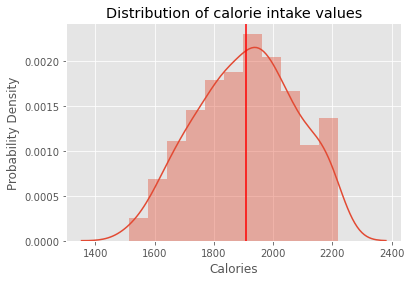

In [42]:
# Plot the distribution of calorie intake values
sns.distplot(cal_intake)
# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of calorie intake values"), 
# Draw red line to show the mean value
plt.axvline(np.mean(cal_intake), color="red")
plt.show()

In this workout programme, it is advised that less calories are consumed on rest/cardio days (between 200 and 300 calories less than training days). In the code below, a uniform distribution is created and the ```numpy.where()``` function is applied, which returns elements depending on a condition.<SUP>17</SUP>

In [44]:
# Create a variable with calorie a
less_cals = np.random.uniform(200, 300)
df["Input"] = np.where((((df["Workout"])=="Rest") | ((df["Workout"])=="Cardio")), cal_intake - int(less_cals), cal_intake)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input
0,2020-01-01,Wednesday,Resistance,225,2226.0,1969
1,2020-01-02,Thursday,Legs,398,NaN,1850
2,2020-01-03,Friday,Cardio,583,NaN,1380
3,2020-01-04,Saturday,Cardio,510,NaN,1642
4,2020-01-05,Sunday,Rest,0,NaN,1741
5,2020-01-06,Monday,Legs,310,NaN,2214
6,2020-01-07,Tuesday,Resistance,264,NaN,1834
7,2020-01-08,Wednesday,Resistance,206,NaN,1894
8,2020-01-09,Thursday,Legs,388,NaN,1947
9,2020-01-10,Friday,Cardio,603,NaN,1684


The plot below shows the uniform distribution used in reducing the calorie intake on weekends.

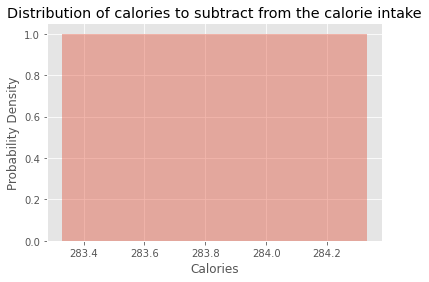

In [50]:
# Plot the distribution of calorie intake values
sns.distplot(less_cals, kde=False)
# Add plot title and axes labels
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title("Distribution of calories to subtract from the calorie intake"), 
plt.show()

#### Calorie Output

The calorie output is calculated by adding the TDEE and Burned columns. Only the first row will be populated at this point.

In [14]:
# Create the Cals Out column and populate the first row
df["Output"] = np.nan
df.loc[0, "Output"] = df.loc[0, "TDEE"] + df.loc[0, "Burned"]

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN


#### Weight

The next column to be created is one which simply shows the difference between calorie intake and output. If the value is negative, then the client has achieved a calorie deficit for that day. Otherwise, more calories were consumed than burned.

In [15]:
# Create the Difference column
df["Difference"] = np.nan
df.loc[0, "Difference"] = df.loc[0, "Input"] - df.loc[0, "Output"]

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN


Similarly, 

In [16]:
# Create the Gain/Loss column
df["Loss"] = np.nan
df.loc[0, "Loss"] = round(cal_to_kg(df.loc[0, "Difference"]) + (np.random.choice((-1, 1)) * np.random.normal(0.04, 0.01)), 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN


In [17]:
# Creating the weight column.
df["Weight"] = np.nan
df.loc[0, "Weight"] = round(weight_kg + df.loc[0, "Loss"], 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN


#### BMI

In [18]:
# Creating BMI column.
df["BMI"] = np.nan
df.loc[0, "BMI"] = round(bmi(df.loc[0, "Weight"], height_m), 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9,27.75
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN,NaN


#### RHR

In [19]:
# Normal range 60-100
# started at 70
# go from 70 down to 62
rhr = np.round(np.linspace(70, 62, 366), 2) + np.round(np.random.normal(0, 1, 366), 2)
print(rhr)

[68.32 70.38 70.05 70.05 70.79 68.81 69.75 69.62 69.99 69.83 68.13 69.58
 70.69 69.92 68.88 69.73 67.6  70.85 68.57 68.77 68.82 69.16 69.13 69.72
 69.94 69.55 69.15 70.36 68.97 69.11 68.35 70.7  68.52 69.12 70.58 69.28
 69.36 69.33 69.27 69.58 69.07 69.92 70.27 69.9  70.36 68.3  66.3  68.68
 68.31 68.9  69.   68.16 68.96 70.21 70.06 68.85 68.63 67.74 68.23 68.22
 68.69 67.92 68.43 70.33 69.13 68.69 70.07 67.84 69.43 67.84 69.44 69.65
 70.24 66.45 69.14 67.53 69.13 70.27 66.29 69.31 68.3  66.49 69.06 67.62
 66.75 68.66 70.03 69.16 68.5  69.05 69.71 67.87 66.95 68.7  68.23 68.35
 67.88 68.85 68.14 68.   69.34 67.49 67.41 67.67 66.82 68.17 67.81 70.19
 66.91 66.7  66.97 65.99 68.08 66.66 67.28 69.47 68.57 68.97 67.96 67.51
 66.87 67.21 68.25 67.8  68.7  68.17 67.11 65.33 67.46 66.59 67.93 67.11
 67.17 67.99 67.68 66.84 67.8  65.94 67.28 67.91 66.4  68.34 65.39 65.85
 66.91 65.83 66.23 66.87 67.24 66.47 67.78 67.39 66.67 67.13 65.6  66.47
 67.67 66.87 65.9  68.48 64.81 66.04 66.11 65.25 68

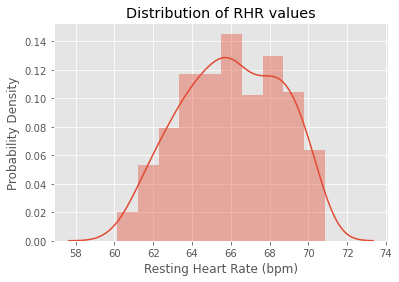

In [20]:
# Plot the distribution of RHR values
sns.distplot(rhr)
plt.xlabel("Resting Heart Rate (bpm)"), plt.ylabel("Probability Density"), plt.title('Distribution of RHR values'), 
plt.show()

In [21]:
df["RHR"] = rhr

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9,27.75,68.32
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN,NaN,70.38
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN,NaN,70.05
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN,NaN,70.05
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN,NaN,70.79
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN,NaN,68.81
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN,NaN,69.75
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN,NaN,69.62
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN,NaN,69.99
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN,NaN,69.83


#### FBG

5.0 and 5.5 is the optimal https://stackoverflow.com/questions/14058340/adding-noise-to-a-signal-in-python

In [22]:
fbg = np.round(np.linspace(5.8, 5.2, 366), 2) + np.round(np.random.normal(0, 0.1, 366), 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9,27.75,68.32
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN,NaN,70.38
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN,NaN,70.05
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN,NaN,70.05
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN,NaN,70.79
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN,NaN,68.81
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN,NaN,69.75
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN,NaN,69.62
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN,NaN,69.99
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN,NaN,69.83


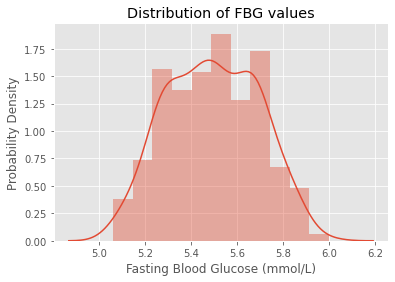

In [23]:
# Plot the distribution of RHR values
sns.distplot(fbg)
plt.xlabel("Fasting Blood Glucose (mmol/L)"), plt.ylabel("Probability Density"), plt.title('Distribution of FBG values'), 
plt.show()

In [24]:
df["FBG"] = fbg

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR,FBG
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9,27.75,68.32,5.85
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN,NaN,70.38,5.86
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN,NaN,70.05,5.85
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN,NaN,70.05,5.80
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN,NaN,70.79,5.74
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN,NaN,68.81,5.89
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN,NaN,69.75,5.77
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN,NaN,69.62,5.86
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN,NaN,69.99,5.84
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN,NaN,69.83,5.90


#### Populating the Data Set

In [25]:
# For loop to fill in missing values, starting from the second row.
for i in range(1, len(df)):    
    # tdee depends on the weight of the previous day.
    df.loc[i, "TDEE"] = tdee(df.loc[i-1, "Weight"], height_m)    
    # cals_out is the addition of tdee + exercise_cals.
    df.loc[i, "Output"] = df.loc[i, "TDEE"] + df.loc[i, "Burned"]     
    # cal_dif is the subtraction of cals_out from cals_in.
    df.loc[i, "Difference"] = round(df.loc[i, "Input"] - df.loc[i, "Output"], 2)    
    # gain_or_loss is the conversion of cals_out to weight plus a random variant.
    df.loc[i, "Loss"] = round(cal_to_kg(df.loc[i, "Difference"]) + (np.random.choice((-1, 1)) * np.random.normal(0.04, 0.01)), 2)    
    # weight is the subtraction of gain_or_loss from the previous day's weight.
    df.loc[i, "Weight"] = round(df.loc[i-1, "Weight"] + df.loc[i, "Loss"], 2) 
    # bmi is the conversion of weight to a BMI score.
    df.loc[i, "BMI"] = round(bmi(df.loc[i, "Weight"], height_m), 2)
    
# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR,FBG
0,2020-01-01,Wednesday,Chest,287,2226.00,2084,2513.00,-429.00,-0.10,89.90,27.75,68.32,5.85
1,2020-01-02,Thursday,Arms,179,2224.80,2240,2403.80,-163.80,0.02,89.92,27.75,70.38,5.86
2,2020-01-03,Friday,Rest,0,2225.04,1782,2225.04,-443.04,-0.11,89.81,27.72,70.05,5.85
3,2020-01-04,Saturday,Rest,0,2223.72,1539,2223.72,-684.72,-0.11,89.70,27.69,70.05,5.80
4,2020-01-05,Sunday,Cardio,496,2222.40,1838,2718.40,-880.40,-0.04,89.66,27.67,70.79,5.74
5,2020-01-06,Monday,Delts,297,2221.92,2083,2518.92,-435.92,-0.04,89.62,27.66,68.81,5.89
6,2020-01-07,Tuesday,Chest,190,2221.44,1693,2411.44,-718.44,-0.06,89.56,27.64,69.75,5.77
7,2020-01-08,Wednesday,Chest,186,2220.72,1820,2406.72,-586.72,-0.03,89.53,27.63,69.62,5.86
8,2020-01-09,Thursday,Arms,174,2220.36,1977,2394.36,-417.36,-0.02,89.51,27.63,69.99,5.84
9,2020-01-10,Friday,Rest,0,2220.12,1477,2220.12,-743.12,-0.06,89.45,27.61,69.83,5.90


### Analysis

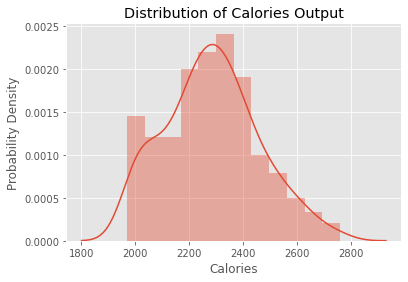

In [26]:
# Plot the distribution of RHR values
sns.distplot(df.Output)
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title('Distribution of calories output'), 
plt.show()

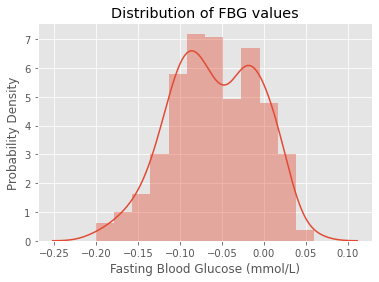

In [27]:
# Plot the distribution of RHR values
sns.distplot(df.Loss)
plt.xlabel("Fasting Blood Glucose (mmol/L)"), plt.ylabel("Probability Density"), plt.title('Distribution of FBG values'), 
plt.show()

### References

1. TechTarget, *synthetic data* [online] Available at: https://searchcio.techtarget.com/definition/synthetic-data

2. w3resource, *Pandas: Data Manipulation - date_range() function* [online] Available at: https://www.w3resource.com/pandas/date_range.php

3. Pandas, *pandas.Series.dt.day* [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html

4. Stack Overflow, *When to use Category rather than Object?* [online] Available at: https://stackoverflow.com/questions/30601830/when-to-use-category-rather-than-object

5. Pandas, *Categorical data* [online] Available at: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html 

6. w3resource. *Pandas DataFrame: head() function* [online] Available at: https://www.w3resource.com/pandas/dataframe/dataframe-head.php

7. Compendium of Physical Activities, *Activity Categories* [online] Available at: https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories

8. Franklin, B.A. et al., 2017. "Using Metabolic Equivalents in Clinical Practice", *The American Journal of Cardiology*, 121, pp. 382-387. Available from: Science Direct [accessed 08 December 2020]

9. Stack Overflow, *pandas create new column based on values from other columns / apply a function of multiple columns, row-wise* [online] Available at: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o/26887820#26887820

10. Wikipedia, *Body mass index* [online] Available at: https://en.wikipedia.org/wiki/Body_mass_index

11. Grigolon, R.B., et al., 2020. "Caloric restriction, resting metabolic rate and cognitive performance in Nonobese adults: A post-hoc analysis from CALERIE study", *Journal of Psychiatric Research*, 128 (2020), pp. 16-22. Available from: Science Direct [accessed 08 December 2020]

12. Wikipedia, *Harris-Benedict equation* [online] Available at: https://en.wikipedia.org/wiki/Harris%E2%80%93Benedict_equation

13. Mayo Clinic, *Counting calories: Get back to weight-loss basics* [online] Available at: https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/calories/art-20048065 

14. Wikipedia, *Truncated normal distribution* [online] Available at: https://en.wikipedia.org/wiki/Truncated_normal_distribution

15. SciPy, *scipy.stats.truncnorm*, [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html

16. Harvard Health Publishing, *Calorie counting made easy* [online] Available at: https://www.health.harvard.edu/staying-healthy/calorie-counting-made-easy

17. Numpy, *numpy.where* [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.where.html